In [54]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("triangle0.csv")
df

,multiplier,bounding_boxW,bounding_boxH,avg_fps,tileW,tileH
0,1.0,512,512,229.254776,8,8
1,1.0,512,512,226.238962,9,9
2,1.0,512,512,238.141445,10,10
3,1.0,512,512,192.788472,11,11
4,1.0,512,512,247.788225,12,12
...,...,...,...,...,...,...
315,0.1,51,51,1287.322215,35,35
316,0.1,51,51,1288.742714,36,36
317,0.1,51,51,1286.307708,37,37
318,0.1,51,51,1282.253151,38,38


In [40]:
max_fps = pd.DataFrame(columns=["bbW", "bbH", "tileW", "tileH", "avg_fps"])
i = 0
for multiplier in df["multiplier"].unique():
    sub_df = df[df["multiplier"] == multiplier]
    max_fps.loc[i] = \
        df.iloc[sub_df["avg_fps"].idxmax()][["bounding_boxW", "bounding_boxH", "tileW", "tileH", "avg_fps"]].values
    i += 1
max_fps = max_fps.sort_values(by=["bbW", "bbH"]).reset_index(drop=True)
max_fps


,bbW,bbH,tileW,tileH,avg_fps
0,51.0,51.0,18.0,18.0,1349.535016
1,102.0,102.0,17.0,17.0,1184.124859
2,153.0,153.0,17.0,17.0,980.016531
3,204.0,204.0,17.0,17.0,799.589814
4,256.0,256.0,20.0,20.0,653.520078
5,307.0,307.0,24.0,24.0,533.783287
6,358.0,358.0,20.0,20.0,444.292551
7,409.0,409.0,26.0,26.0,369.591359
8,460.0,460.0,23.0,23.0,321.873826
9,512.0,512.0,27.0,27.0,269.107503


<AxesSubplot: xlabel='bbW'>

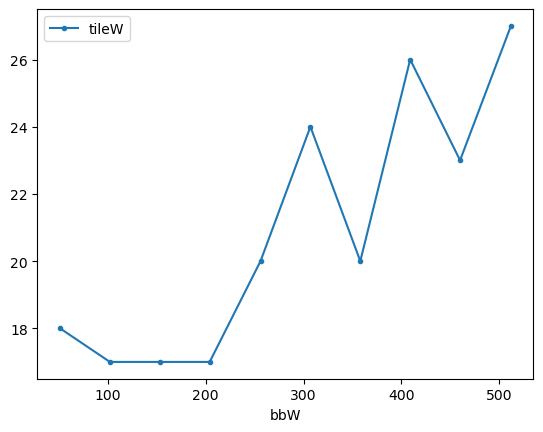

In [49]:
max_fps.plot(x="bbW", y="tileW", style='.-')

In [52]:
X = max_fps["bbW"].values.reshape(-1, 1)
Y = max_fps["tileW"].values.reshape(-1, 1)
r = LinearRegression()
r.fit(X, Y)

LinearRegression()

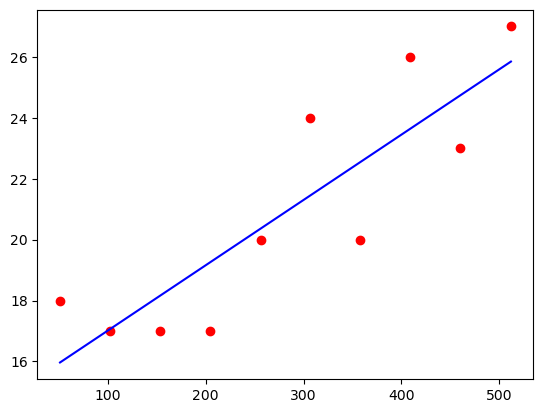

In [57]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, r.predict(X), color = 'blue')

In [59]:
(r.coef_, r.intercept_)

(array([[0.02143713]]), array([14.87187843]))